# Explore here

In [320]:
from imblearn.metrics import specificity_score
from lazypredict.Supervised import LazyRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, export_text
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import xgboost as xgb


In [321]:
# Your code here
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [322]:
print(df.shape)
df.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [323]:
unique_var = df.nunique()==1

if any(unique_var): 
    for col in unique_var.index[unique_var] : print(f"The variable {i} content only one category.")
else: print(f"There's no variable with only one category.")

There's no variable with only one category.


In [324]:
aux = df.nunique().sort_values().head()
aux1 = df.nunique().sort_values().tail()
print(f''' 
      Unique values sorted head(5):
      
      {aux}
      
      Unique values sorted tail(5)
      
      {aux1}
      ''')


 
      Unique values sorted head(5):
      
      Outcome           2
Pregnancies      17
BloodPressure    47
SkinThickness    51
Age              52
dtype: int64
      
      Unique values sorted tail(5)
      
      Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64
      


In [325]:
print(f'Number of duplicated values: {df.duplicated().sum()}') 

Number of duplicated values: 0


In [326]:
print(f'Number of NaN values: {df.isna().sum().sum()}') 

Number of NaN values: 0


In [327]:
aux = list(df.columns[df.dtypes=='object'])
print(f'Columns dtypes == "object": {aux}')

Columns dtypes == "object": []


In [328]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [329]:
print(df.Outcome.sum()/df.Outcome.count()) #Solo de curioso

0.3489583333333333


In [330]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1


Text(0, 0.5, 'count')

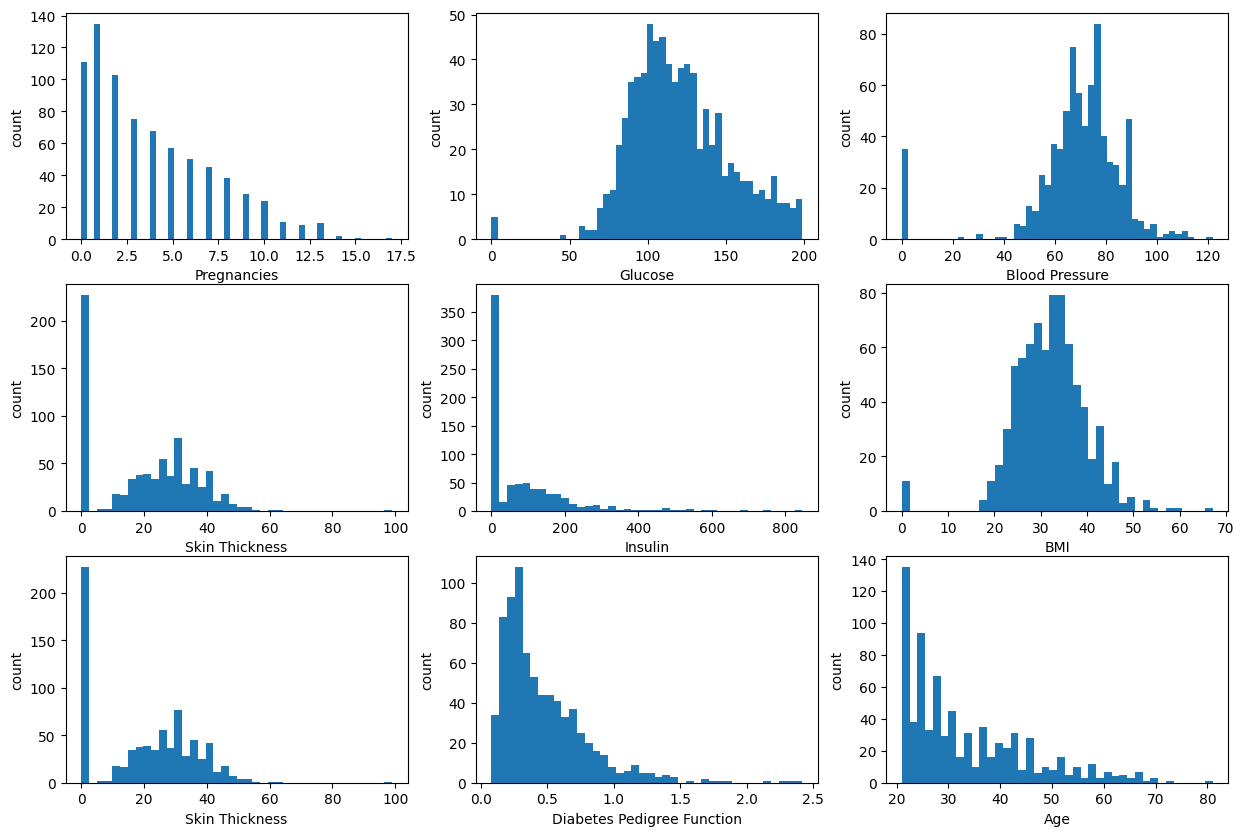

In [331]:
#para hacerme una idea de las distribuciones segun c/valor numerico
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 10))

ax1.hist(df['Pregnancies'], bins=50)
ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('count')

ax2.hist(df['Glucose'], bins=50)
ax2.set_xlabel('Glucose')
ax2.set_ylabel('count')

ax3.hist(df['BloodPressure'], bins=50)
ax3.set_xlabel('Blood Pressure')
ax3.set_ylabel('count')

ax4.hist(df['SkinThickness'], bins=40)
ax4.set_xlabel('Skin Thickness')
ax4.set_ylabel('count')

ax5.hist(df['Insulin'], bins=40)
ax5.set_xlabel('Insulin')
ax5.set_ylabel('count')

ax6.hist(df['BMI'], bins=40)
ax6.set_xlabel('BMI')
ax6.set_ylabel('count')

ax7.hist(df['SkinThickness'], bins=40)
ax7.set_xlabel('Skin Thickness')
ax7.set_ylabel('count')

ax8.hist(df['DiabetesPedigreeFunction'], bins=40)
ax8.set_xlabel('Diabetes Pedigree Function')
ax8.set_ylabel('count')

ax9.hist(df['Age'], bins=40)
ax9.set_xlabel('Age')
ax9.set_ylabel('count')

In [332]:
df[df==0].count()/df.count()

Pregnancies                0.14
Glucose                    0.01
BloodPressure              0.05
SkinThickness              0.30
Insulin                    0.49
BMI                        0.01
DiabetesPedigreeFunction   0.00
Age                        0.00
Outcome                    0.65
dtype: float64

In [333]:
# Cambio los valores 0 de cada columna con el KNMImputer, con los valores de los 4 vecinos cercanos.

df_imputed = df.copy() 
columns_to_impute = df_imputed.drop(['Pregnancies', 'Outcome'], axis=1) # Excluyo las columnas 'Pregnancies' y 'Outcome' porque sí nos interesan esos valores 0
columns_to_impute.replace(0, np.nan, inplace=True) #paso los ceros a nan para el KNMImp
imputer = KNNImputer(n_neighbors=4)
imputed_values = imputer.fit_transform(columns_to_impute)
imputed_df = pd.DataFrame(imputed_values, columns=columns_to_impute.columns) # el KNM me lo cambia a array, lo vuelvo a df
df_imputed = pd.concat([df_imputed[['Pregnancies']].reset_index(drop=True),imputed_df, df_imputed[['Outcome']].reset_index(drop=True)], axis=1) # meto de nuevo 'Pregnancies' y 'Outcome' con los valores 0 que si nos interesan 

print(df_imputed)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6   148.00          72.00          35.00   125.75 33.60   
1              1    85.00          66.00          29.00    62.25 26.60   
2              8   183.00          64.00          25.75   176.25 23.30   
3              1    89.00          66.00          23.00    94.00 28.10   
4              0   137.00          40.00          35.00   168.00 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10   101.00          76.00          48.00   180.00 32.90   
764            2   122.00          70.00          27.00   158.75 36.80   
765            5   121.00          72.00          23.00   112.00 26.20   
766            1   126.00          60.00          30.75   114.00 30.10   
767            1    93.00          70.00          31.00    70.75 30.40   

     DiabetesPedigreeFunction   Age  Outcome  
0                        0.63 50.00        1  
1                

Text(0, 0.5, 'count')

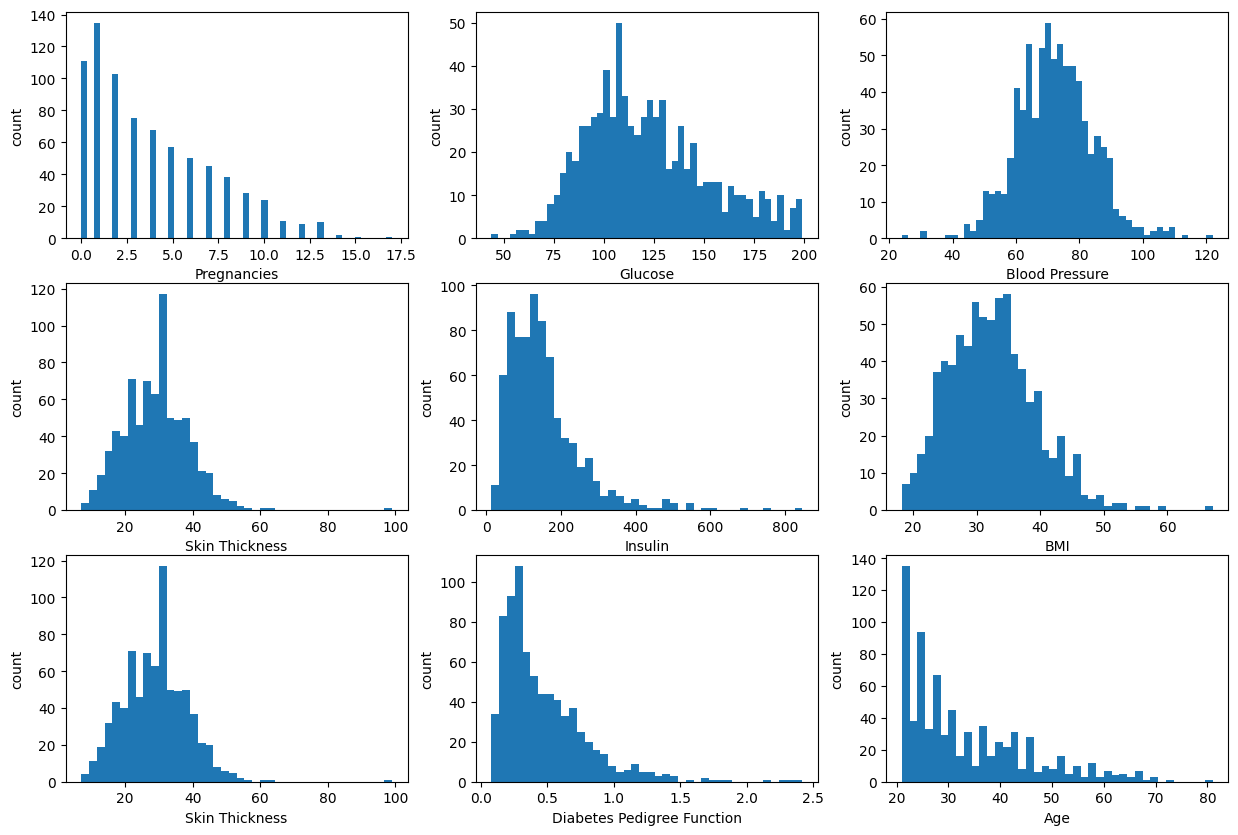

In [334]:
# Veo de nuevo como han quedado las distribuciones
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 10))

ax1.hist(df_imputed['Pregnancies'], bins=50)
ax1.set_xlabel('Pregnancies')
ax1.set_ylabel('count')

ax2.hist(df_imputed['Glucose'], bins=50)
ax2.set_xlabel('Glucose')
ax2.set_ylabel('count')

ax3.hist(df_imputed['BloodPressure'], bins=50)
ax3.set_xlabel('Blood Pressure')
ax3.set_ylabel('count')

ax4.hist(df_imputed['SkinThickness'], bins=40)
ax4.set_xlabel('Skin Thickness')
ax4.set_ylabel('count')

ax5.hist(df_imputed['Insulin'], bins=40)
ax5.set_xlabel('Insulin')
ax5.set_ylabel('count')

ax6.hist(df_imputed['BMI'], bins=40)
ax6.set_xlabel('BMI')
ax6.set_ylabel('count')

ax7.hist(df_imputed['SkinThickness'], bins=40)
ax7.set_xlabel('Skin Thickness')
ax7.set_ylabel('count')

ax8.hist(df_imputed['DiabetesPedigreeFunction'], bins=40)
ax8.set_xlabel('Diabetes Pedigree Function')
ax8.set_ylabel('count')

ax9.hist(df_imputed['Age'], bins=40)
ax9.set_xlabel('Age')
ax9.set_ylabel('count')

In [335]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)


In [336]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
1,Glucose,25.71
7,Age,15.44
5,BMI,15.03
3,SkinThickness,12.61
4,Insulin,11.50
6,DiabetesPedigreeFunction,8.22
2,BloodPressure,6.78
0,Pregnancies,4.70


All variables are relevant and should be considered

In [337]:
'''
Obtenemos los valores de inflación de la varianza a partir de la matriz de correlaciones. 
Esto nos ayuda a identificar aquellas variables que presentan correlación con otras en nuestro dataset; 
esto es importante ya que debemos siempre que sea posible evitar la redundancia en los datos con el fin de 
mejorar la capacidad predictiva y de generalización de nuestros modelos. 
Un buen punto de corte para el vif suele ser 10. Un vif infinito implica una correlación perfecta.
'''
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

Pregnancies                3.86
Glucose                    6.45
BloodPressure              2.48
SkinThickness              8.09
Insulin                    5.77
BMI                        9.36
DiabetesPedigreeFunction   1.24
Age                        5.95
dtype: float64

In [338]:
# matriz de correlaciones segun VIF
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y
Pregnancies,1.000,0.144,0.196,0.117,0.043,0.034,-0.023,0.548,0.207
Glucose,0.144,1.000,0.224,0.198,0.610,0.248,0.164,0.269,0.514
BloodPressure,0.196,0.224,1.000,0.225,0.123,0.268,0.018,0.347,0.172
SkinThickness,0.117,0.198,0.225,1.000,0.183,0.668,0.131,0.141,0.291
Insulin,0.043,0.610,0.123,0.183,1.000,0.236,0.150,0.212,0.307
BMI,0.034,0.248,0.268,0.668,0.236,1.000,0.154,0.033,0.332
DiabetesPedigreeFunction,-0.023,0.164,0.018,0.131,0.150,0.154,1.000,0.026,0.147
Age,0.548,0.269,0.347,0.141,0.212,0.033,0.026,1.000,0.285
y,0.207,0.514,0.172,0.291,0.307,0.332,0.147,0.285,1.000


None of variables seems to be extremely correlated with another one in a significant way. We may proceed with all variables

In [364]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [367]:
X_train = df_imputed.drop(["Outcome"], axis = 1)
y_train = df_imputed["Outcome"]
X_test = df_imputed.drop(["Outcome"], axis = 1)
y_test = df_imputed["Outcome"]

#empezar ahora si con el algoritmo de la clase BOOSTING